# Chapter 9 
# Support Vector Machines

SVM is a generalization of a simple and intuitive classifier called the _Maximal margin classifier_.

## Maximal Margin Classifier
__Hyperplane__ :- In a p-dimensional space, a flat affice subspace of dimension p-1. In 2 dimensional space, a hyperplane is a line. 

In 2-dimension space, a hyperplane is defined as $$\beta_0 + \beta_1 X_1 + \beta_2 X_2 = 0$$ for paramters $\beta_0, \beta_1 and \beta_2$.

Any $X = (X_1, X_2)^T$ for which above equation holds is a point on the hyperplane. In 2 dimension, a hyperplane is a line.

In case of p-dimension, a hyperplane $\beta_0 + \beta_1 X_1 +.....+ \beta_p X_p = 0$ defines a p-dimensional hyperplane.

Now, suppose that X does not satisfy the above equation. If $\beta_0 + \beta_1 X_1 +.....+ \beta_p X_p > 0$, then X lies to one side of the hyperplane and if $\beta_0 + \beta_1 X_1 +.....+ \beta_p X_p < 0$, then X lies on the other side of the hyperplane. 

So, a hyperplane is dividing p-dimensional space into 2 halves.

### Classification using a seperating Hyperplane:-

For a n X p data matrix X where all observations fall into two classes, $y_1,....,y_n\  \epsilon $ {-1,1} and a set of test observations $x^* = (x_1^*,....,x_p^*)$.

Goal is to develop a classifier based on training data that will correctly classify the test observation using its feature measurement.

__Seperating hyperplane__ :- Suppose it's possible to construct a hyperplane that seperates the training observations perfectly according to their class labels. Then a seperating hyperplane has the property that 
$$y_i(\beta_0 + \beta_1 X_{i1} +.....+ \beta_p X_{ip}) > 0$$ for all i = 1,2,...,n.

For test observation classification, we can look at sign of $f(x^*) = \beta_0 + \beta_1 X_1^* +.....+ \beta_p X_p^*$.
* If $f(x^*)$ is negetive, then class = -1.
* If $f(x^*)$ is positive, then class = 1.

We can use magnitude of $f(x^*)$. If $f(x^*)$ far from zero, $x^*$ lies far from hyperplane and we are more confident about our classification and vice versa.

### Maximal Margin Classifier
If our data can be perfectly seperated using a hyperplane, then there will be infinite number of such hyperplane because a given hyperplane can be shifted and rotated without touching any of the observation.
* Maximal margin hyperplane is a reasonable way to decide which of the infinite hyperplane to choose.
* We will compute the perpendicular distance from each training observation to a given seperating hyperplane; the smallest such distance is the minimal distance from the observation to the hyperplane and is known as __margin__.

Maximal Margin hyperplane is the seperating hyperplane for which margin is largest. We then classify the test observation based on what side of hyperplane these observations lies. In a sense, the maximal margin hyperplane represents the mid-line of the widest "slab" that we can insert between the two classes.

Maximal margin classifier is often successful, it can also led to overfitting when p is large.

An example of Maximal Margin Calssifier is presented below.

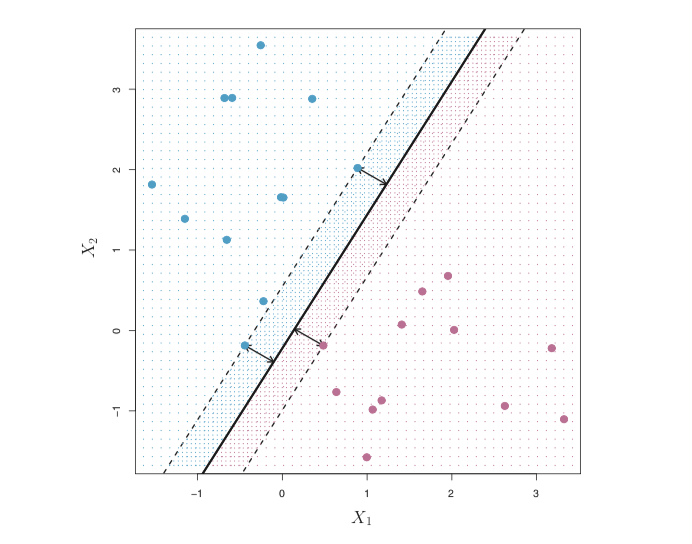

In [3]:
from IPython.display import Image
Image(filename = "/Users/atyagi/Desktop/ISLR Python Repo/ISLR_Notes_codes/Maximal Margin Classifier.png")

The points indicating the width of margin (or lies along the gutters of the road) are known as support vectors, since they are vector in p-dimensional space and they support the hyperplane in the sense that if these points moved slightly then the maximal margin hyperplane would move as well. Our hyperplane do not depend on any other observation.

__Construction of Maximal Margin Classifier__:-
The maximal margin hyperplane is the solution to the optimization problem.

*  $maximize_{\beta_0, \beta_1,...,\beta_p} M$.

__Constraints__ :-
    
1. subject to $\sum_{j = 1}^{p}\beta_j^2 = 1$.
2. $y_i(\beta_0 + \beta_1 X_{i1} +.....+ \beta_p X_{ip}) > M\ \ \ \forall\  i = 1,2,...,n.$

2nd contraint gurantees that each observation will be on the correct side of the hyperplane, provided that M is positive.

1st constraint add meaning to 2nd constraint, given the 1st constraint, the perpendicular distance from the observation to the hyperplane is $y_i(\beta_0 + \beta_1 X_{i1} +.....+ \beta_p X_{ip})$.

Constraints ensure that each point is on the correct side and at least M distance from hyperplane.


__The Non-seperable Case__ :-
In many cases no seperating hyperplane exists, and so there is no maximal margin classifier. So no solution with M > 0.

But we can extend the same concept to generalize maximal margin classifier to the non-seperable case, which is known as __Support Vector Classifier__.

__Disadvantage of Maximal Margin Classifier__ :-

* A classifier based on a seperating hyperplane will necessary perfectly classify all the trainign observations, this can lead to sensitivity to individual observations.
* Maximal margin hyperplane can be extremely sensitive to a change in a single observation suggest that it may have overfit the training data.

In this case, we might be willing to consider a classifier based on a hyperplane that does not perfectly seperate the two classes in the interest of 
1. Great robustness to individual observations.
2. Better classification of most of training observation.

## Support Vector Classifier
The support vector classifier sometime called a soft margin classifier.

* It allows some observations to be on the incorrect side of the margin or even the incorrect side of the hyperplane.(and the margin is soft i.e. it is tolerant of some violations).
* This approach is more practical because when there is no seperating hyperplane, such a situation is inevitable.
* Observations on the wrong side of the hyperplane are misclassified by the support vector classifier.

Support Vector classifier is a solution to the optimization problem
*  $maximize_{\beta_0, \beta_1,...,\beta_p,\epsilon_1,\epsilon_2,...,\epsilon_n} M$.

__Constraints__ :-
    
1. subject to $\sum_{j = 1}^{p}\beta_j^2 = 1$.
2. $y_i(\beta_0 + \beta_1 X_{i1} +.....+ \beta_p X_{ip}) > M(1-\epsilon_i)\ \ \ \forall\  i = 1,2,...,n.$
3. $\epsilon_1 \ge 0, \sum_{i = 1}^{n}\epsilon_i \le C.$

C is a non-negetive tuning parameter.

M = width of the margin (we seek this to be as large as possible).

$\epsilon_i$ = slack variables, that allow individual observations to be on the wrong side of the margin or the hyperplane. Classification of the test observation remains same as Maximal Margin classifier.

Slack variables tells us where the ith observation is located relative to the hyperplane and relative to the margin.
* If $\epsilon_i$ = 0, the ith observation is on the other side of the margin.
* If $\epsilon_i$ > 0, the ith observation is on the wrong side of the margin (violated the margin).
* If $\epsilon_i$ > 1, then it is on the wrong side of the hyperplane.

C(tuning paramter) :- It bounds the sum of $\epsilon_i$, so it determines severity of the violation to the margin that it will tolerate.
* C = 0, there is no budget for violations to the margin (Maximal Margin Classifier).
* C > 0, no more than C observations can be on the wrong side of the hyperplane (If observation is on the wrong side $\epsilon$ > 1 and $\sum_{i = 1}^{n}\epsilon_i \le C).$
* As C increases we become more tolerant of violations to the margin and vice versa. 
* C controls the bias-variance trade off. When C is small, we seek narrow margins, this leads to low bias but high variance. When C is large, we have wider margin, this leads to potentially more bias but may have lower variance.

In this optimization problem, only observations that either lie on the margin or that violate the margin will effect the hyperplane. The observation are called support vectors. No. of support vectors are controlled by C.

Support Vector Classifier is quite robust to the observation behaviour that are far from the hyperplane. Unlike LDA, that is sensitive to all of the observations.

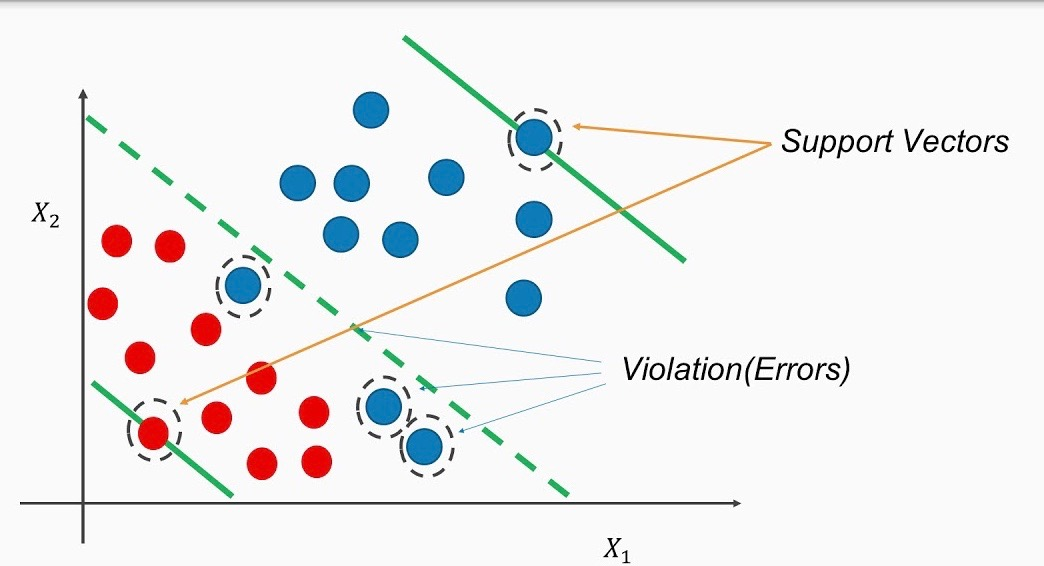

In [4]:
Image(filename = "/Users/atyagi/Desktop/ISLR Python Repo/ISLR_Notes_codes/Support Vector Classifier.jpg")

__Classification with Non-linear Decision Boundaries__

To address the problem of possible non-linear boundaries between, we can expand the feature space using quadratic, cubic and even higher-order polynomial functions of the predictors. For e.g. we can use 
$$X_1, X_1^2, X_2, X_2^2,...,X_p, X_p^2$$ for fitting a support vector classifier.

The decision boundary that result from using this new feature space will still be linear in new feature space but in the original feature space, the decision boundary becomes non-linear. Other functions of predictors can also be considered, but with large no. of features, computations become unmanageable.

## Support Vector Machines